In [ ]:
                                          LOGISTIC REGRESSION

In [ ]:
#Logistic Regression is a statistical method used for binary classification problems, where the goal is to predict one of two possible outcomes.
#Despite its name, logistic regression is actually a classification algorithm, not a regression algorithm.

#Types of Logistic Regression
Binary Logistic Regression : Used for two-class problems (e.g., spam vs. not spam, pass vs. fail).

Multinomial Logistic Regression : Used for multiple classes (e.g., predicting categories like dog, cat, or horse).

Ordinal Logistic Regression : Used when the output classes have a natural order (e.g., low, medium, high).


#How It Works:
Linear Combination of Features:

1) Like linear regression, it calculates a weighted sum of input features:
𝑍=𝑤0+𝑤1𝑋1+𝑤2𝑋2+...+𝑤𝑛𝑋𝑛 are the coefficients (weights), and 𝑋1,𝑋2,...,𝑋𝑛 are re the input features.

2) Sigmoid Activation (Logistic Function):

Instead of predicting a continuous output, it applies the sigmoid function to squash the result into a range between 0 and 1:
𝑃(𝑌=1)=1/1+𝑒−𝑍
 
This gives a probability score for the class 1. If this probability is greater than 0.5, we classify it as 1; otherwise, we classify it as 0.

3) Loss Function (Log Loss / Cross-Entropy Loss):

The model is trained using the log loss function, which measures how different the predicted probabilities are from the actual labels.
𝐿𝑜𝑠𝑠=−1/𝑚 ∑[𝑦𝑖log(𝑦^𝑖)+(1−𝑦𝑖)log(1−𝑦^𝑖)]

4 )Optimization (Gradient Descent):

The model updates weights using gradient descent or other optimization algorithms like Adam to minimize the loss.

In [ ]:
#Dataset Overview: Breast Cancer Data

This dataset contains 272 records with 10 columns, capturing various features related to breast cancer recurrence.

Column Breakdown:
    
age (object) - Age group of the patient (e.g., "40-49", "50-59").
    
mefalsepause (object) - Menopause status: "premfalse" (premenopausal) or "ge40" (postmenopausal).
    
tumor-size (object) - Tumor size in ranges (e.g., "15-19", "35-39").
    
inv-falsedes (object) - Invasive nodes involved (e.g., "0-2", "03-May").
    
falsede-caps (object) - Presence of capsular penetration (True/False). Contains some missing values.
    
deg-malig (int64) - Degree of malignancy (1, 2, or 3).
    
breast (object) - Breast affected: "left" or "right".
    
breast-quad (object) - Quadrant of the breast affected (e.g., "left_up", "central"). One missing value.
    
irradiat (bool) - Whether radiation therapy was used (True/False).
    
class (object) - Target variable: "recurrence-events" (cancer recurrence) or "false-recurrence-events" (no recurrence).
    

Initial Observations:
Some columns have missing values (falsede-caps, breast-quad).
The dataset contains categorical variables, requiring encoding for machine learning.
The class column is the target variable, indicating whether cancer recurred.

Incorrect Column Names:                                       
Some column names seem to have incorrect spellings or formatting issues. Below are the likely correct names based on context:

Incorrect Column Name	   Suggested Correction
mefalsepause	           menopause
inv-falsedes	           inv-nodes (Invasive nodes)
falsede-caps	           node-caps (Capsular invasion)

Our Goal:
We used Logistic Regression to predict if a new patient is likely to have a recurrence (1) or not (0) based on their medical history and tumor characteristics.

Steps to be  followed:
1)Load and inspect the dataset
2)Preprocess the data (Rename columns, handle missing values, encode categorical features)
3)Split the dataset into training and testing sets
4)Train a Logistic Regression model
5)Evaluate the model (Accuracy, Precision, Recall, Confusion Matrix)
6)Plot Graphs for better insights

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
df = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\File\breast-cancer.csv")

In [13]:
df.head()

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,03-May,True,2,left,right_up,False,recurrence-events


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           272 non-null    object
 1   mefalsepause  272 non-null    object
 2   tumor-size    272 non-null    object
 3   inv-falsedes  272 non-null    object
 4   falsede-caps  264 non-null    object
 5   deg-malig     272 non-null    int64 
 6   breast        272 non-null    object
 7   breast-quad   271 non-null    object
 8   irradiat      272 non-null    bool  
 9   class         272 non-null    object
dtypes: bool(1), int64(1), object(8)
memory usage: 19.5+ KB


In [19]:
df.shape

(272, 10)

In [21]:
# Rename incorrect column names
df.rename(columns={"mefalsepause": "menopause", "inv-falsedes": "inv-nodes", "falsede-caps": "node-caps"}, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          272 non-null    object
 1   menopause    272 non-null    object
 2   tumor-size   272 non-null    object
 3   inv-nodes    272 non-null    object
 4   node-caps    264 non-null    object
 5   deg-malig    272 non-null    int64 
 6   breast       272 non-null    object
 7   breast-quad  271 non-null    object
 8   irradiat     272 non-null    bool  
 9   class        272 non-null    object
dtypes: bool(1), int64(1), object(8)
memory usage: 19.5+ KB


In [25]:
## Check missing values
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
class          0
dtype: int64

In [27]:
##checking total missing values
df.isnull().sum().sum()

9

In [33]:
# Fill missing values with mode
#Mode is best for categorical values like "yes", "no", "left_up", "right_low", etc

df["node-caps"].fillna(df["node-caps"].mode()[0], inplace=True)
df["breast-quad"].fillna(df["breast-quad"].mode()[0], inplace=True)

In [35]:
#rechecking the null values if still exists after applying mode in categorial columns
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

In [45]:
# Encode categorical variables using Label Encoding

label_encoders = {}    #This dictionary will store LabelEncoder objects for each categorical column.

categorical_columns = ["age", "menopause", "tumor-size", "inv-nodes", "node-caps", "breast", "breast-quad", "class"]

#This list contains all categorical variables in the dataset.
#These columns contain text values that need to be converted into numerical values for the model.

In [47]:
for col in categorical_columns: #Iterates over each categorical column in the dataset
    
    le = LabelEncoder() #Creates a new LabelEncoder instance for encoding categorical values into numbers
    
    df[col] = le.fit_transform(df[col])#fit() learns the unique categories and assigns numbers to them.Whereas,transform() replaces the categories with these numbers.
                                       #The transformed values are stored back in df[col]
    label_encoders[col] = le  # Store encoders for future reference


In [49]:
# Define features (X) and target variable (y)
X = df.drop(columns=["class"])  # All columns except the target
y = df["class"]  # Target variable

In [51]:
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,2,2,2,0,1,3,1,2,False
1,3,0,2,0,0,1,1,0,False
2,3,0,6,0,0,2,0,1,False
3,2,2,6,0,1,3,1,1,True
4,2,2,5,1,1,2,0,4,False
...,...,...,...,...,...,...,...,...,...
267,3,0,5,2,1,2,0,1,False
268,3,2,4,1,1,2,0,1,True
269,1,2,5,2,1,2,1,4,False
270,3,2,2,0,0,2,1,1,False


In [53]:
y

0      1
1      0
2      1
3      0
4      1
      ..
267    0
268    0
269    0
270    0
271    0
Name: class, Length: 272, dtype: int32

In [55]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Display the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217, 9), (55, 9), (217,), (55,))

In [59]:
# Train the Logistic Regression model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [61]:
# Predict on the test set
y_pred = logreg.predict(X_test)

In [63]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [67]:
accuracy, classification_rep

(0.7272727272727273,
 '              precision    recall  f1-score   support\n\n           0       0.78      0.88      0.83        41\n           1       0.44      0.29      0.35        14\n\n    accuracy                           0.73        55\n   macro avg       0.61      0.58      0.59        55\nweighted avg       0.70      0.73      0.71        55\n')

In [ ]:
#Accuracy = (Correct Predictions) / (Total Predictions)
This means 72.7% of the predictions were correct.

#Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.44      0.29      0.35        14

    accuracy                           0.73        55
   macro avg       0.61      0.58      0.59        55
weighted avg       0.70      0.73      0.71        55

This is the classification report, which provides different evaluation metrics for each class (0 and 1).

Breakdown of Metrics:
Metric	              Meaning
Precision	          Out of the predicted positives (1s), how many were actually correct? (TP / (TP + FP))
Recall	              Out of the actual positives (1s), how many were correctly predicted? (TP / (TP + FN))
F1-score	          Harmonic mean of Precision & Recall (2 * (Precision * Recall) / (Precision + Recall))
Support	              Number of actual occurrences of the class in the test set.                                    

                                                                              
Class-Specific Performance:                                                      
Class 0 (No Recurrence of Cancer)
           0       0.78      0.88      0.83        41
Precision:  0.78 → When the model predicts No Recurrence, it's correct 78% of the time.
Recall:  0.88 → Out of all actual No Recurrence cases, the model correctly identifies 88% of them.
F1-score:  0.83 → Good balance between Precision & Recall.
                                                                              
The model performs well in predicting class 0!

                                                                              
Class 0 (No Recurrence of Cancer)                                              
           0       0.78      0.88      0.83        41
Precision: 0.44 → When the model predicts Recurrence, it's correct only 44% of the time.
Recall: 0.29 → Out of all actual Recurrence cases, the model identifies only 29% of them.
F1-score: 0.35 → Very low, meaning the model struggles with this class.         
              
The model is not performing well in detecting Recurrence cases (class 1).                                                                

In [69]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [73]:
conf_matrix

array([[36,  5],
       [10,  4]], dtype=int64)

In [ ]:
True Negatives (TN) = 36
Model correctly predicted "No Recurrence" when it was actually No Recurrence.

False Positives (FP) = 5 (Type I Error)
Model wrongly predicted "Yes Recurrence", but it was actually No Recurrence.
This means 5 patients were falsely diagnosed with cancer recurrence.
    
False Negatives (FN) = 10 (Type II Error)
Model wrongly predicted "No Recurrence", but it was actually Yes Recurrence.
This is bad! It means 10 patients who actually had recurrence were missed.
    
True Positives (TP) = 4
Model correctly predicted "Yes Recurrence" when it was actually Yes Recurrence.


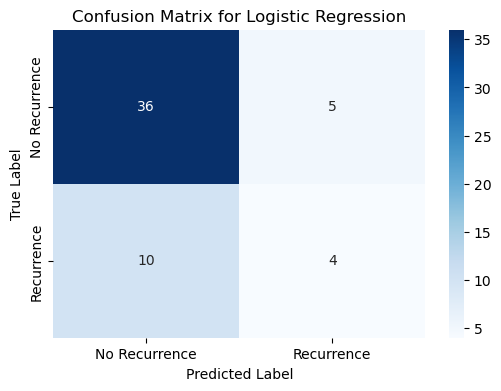

In [71]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Recurrence", "Recurrence"], 
            yticklabels=["No Recurrence", "Recurrence"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()